Calculated Drift: -0.57.
Calculated Volatility:  1.05.
Initial price: $ 31.52.


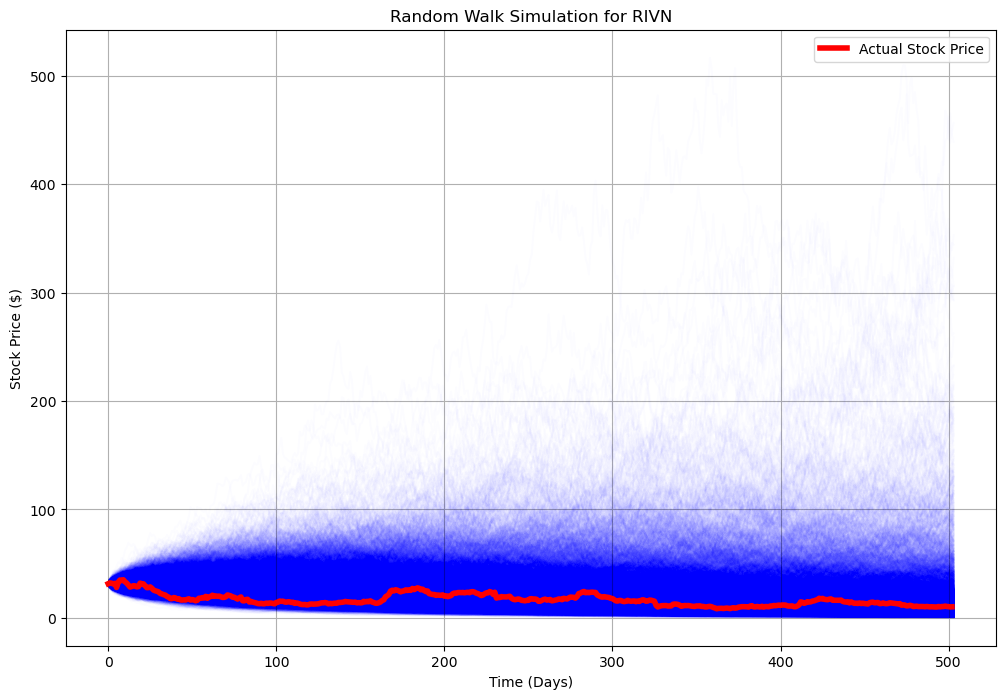

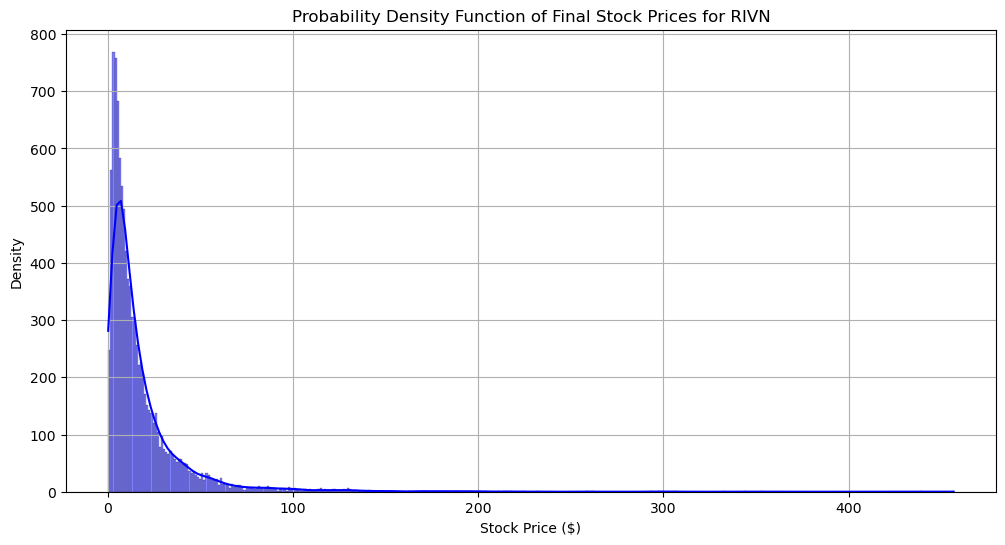

Median Predicted Stock Price: $ 10.26
Mean Predicted Stock Price: $ 17.94
20% Confidence Interval (40th-60th percentile of predicted prices): $7.81 to $13.46


In [76]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

def stock_analysis_and_simulation(ticker, start_date, end_date, N):
    # Converts the input dates from 'dd-mm-yyyy' format to 'yyyy-mm-dd' to be compatible with the historical data.
    start_date = pd.to_datetime(start_date, format='%d-%m-%Y').strftime('%Y-%m-%d')
    end_date = pd.to_datetime(end_date, format='%d-%m-%Y').strftime('%Y-%m-%d')

    # Fetches historical data for the ticker stock from the Yahoo Finance website
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)

    # Calculates daily returns from percentage change between closing prices day after day
    data['Daily Return'] = data['Close'].pct_change()
    
    # Fetches the number of trading days in the historical data
    num_trading_days = data.shape[0]

    '''Calculates the drift by:
    accessing the mean of the daily returns,
    and applies it to all trading days'''
    drift = data['Daily Return'].mean() * num_trading_days
    print(f"Calculated Drift: {drift: .2f}.")

    '''Calculates the volatility
    which is the standard deviation of the daily returns,
    and applies it on all trading days'''
    volatility = data['Daily Return'].std() * math.sqrt(num_trading_days)
    print(f"Calculated Volatility: {volatility: .2f}.")

    S0 = data['Close'].iloc[0]  
    # Fetches the initial stock price (first closing price in the dataset)
    
    T = num_trading_days  
    dt = 1 / T  
    # Time step for each trading day to plug into the GBM equation

    # Simulate N random walks
    S = np.zeros((T + 1, N))  
    '''Creates a matrix to store all the simulations
    (Range: 0 to number of trading days, stores the number of simulations you need)'''
    S[0] = S0  # Set the initial stock price on the y axis
    print(f"Initial price: ${S0: .2f}.")

    for t in range(1, T+1):
        z = np.random.standard_normal(N)  # Generates random noise, ie. the random fluctuation of the values.
        # Uses the geometric brownian motion formula to generate values for each timestep.
        S[t] = S[t - 1] * np.exp((drift - 0.5 * volatility**2) * dt + volatility * z * np.sqrt(dt))

    # Plots the random walk simulation results
    plt.figure(figsize=(12,8))
    plt.plot(S, color='blue', alpha=0.01)  # Plots the matrix S. Alpha controls opacity. 
    plt.plot(data['Close'].values, color='red', linewidth=4, label='Actual Stock Price')  
    # Plots the movement of the actual price by fetching values from daily closes
    plt.title(f"Random Walk Simulation for {ticker}")
    plt.xlabel("Time (Days)")
    plt.ylabel("Stock Price ($)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Save the final stock prices at the end of the simulation
    final_prices = S[-1]

    # Plot the probability density function of the predicted stock prices
    plt.figure(figsize=(12, 6))
    sns.histplot(final_prices, kde=True, color='Blue', bins=400)
    plt.title(f"Probability Density Function of Final Stock Prices for {ticker}")
    plt.xlabel("Stock Price ($)")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

    # Displays the predicted average stock price
    median = np.median(final_prices,axis = 0)
    '''Mean is actually an inaccurate representation of the
    data when outliers are present.'''
    mean = final_prices.mean()
    
    print(f"Median Predicted Stock Price: ${median: .2f}")
    print(f"Mean Predicted Stock Price: ${mean: .2f}")

    # 20% Confidence Intervals with 40-60 percentiles
    lower_bound = np.percentile(final_prices, 40) 
    upper_bound = np.percentile(final_prices, 60)  
    print(f"20% Confidence Interval (40th-60th percentile of predicted prices): ${lower_bound:.2f} to ${upper_bound:.2f}")


# Calls the function and simulate stock prices
stock_analysis_and_simulation('RIVN', '02-11-2022', '02-11-2024', 10000)
